In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS) 

## Aritifical Neural Network
A one hidden layer ANN will follow the following equation:
$$
\begin{align*}
\mathbf{\hat{y}} &= g\left(\mathbf{W}^{(2)} \sigma(\mathbf{W}^{(1)} \mathbf{x} + \mathbf{b}^{(1)}) + \mathbf{b}^{(2)}\right) \\
\end{align*}
$$

where $\mathbf W^{(1)}, \mathbf b^{(1)}$ are the parameters of the first layer, $\mathbf W^{(1)}, \mathbf b^{(2)}$ are the parameters of the second layer, $\mathbf x$ is the input, $\mathbf{\hat{y}}$ is the output, $\sigma$ is the activation function, and $g$ is the function that convertes the score to the desired output.

Here we are performing a binary classification task, so $g(\cdot)$ can be the sigmoid function. We take the activation function to also be the sigmoid function.

The loss function is the squared error loss.
$$  
\begin{align*}
\mathcal L(\mathbf{y}, \mathbf{\hat{y}}) &= \frac{1}{n} \sum_{i=1}^n \left(y^{(i)} - \hat{y}^{(i)}\right)^2
\end{align*}
$$

where $\mathbf{{y}}$ is the ground truth and we consider $n$ samples in the dataset.

Differentiating the loss function with respect to the parameters. We have:

$$
\begin{align*}
\frac{\partial \mathcal L}{\partial \mathbf{W}_{{k}}^{(2)}} &= {1\over n}\sum_{i=1}^n \frac{\partial \left(y^{(i)} - \hat y^{(i)}\right)^2}{\partial \mathbf{W}_{{k}}^{(2)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} \frac{\partial \hat y^{(i)}}{\partial \mathbf{W}_{{k}}^{(2)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} \frac{\partial g\left(\mathbf \sum_{j=1}^m \mathbf W_{j}^{(2)}\sigma\left(\mathbf h_{1j}^{(i)}\right) +\mathbf b_2\right)}{\partial \mathbf{W}_{{k}}^{(2)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right)\frac{\partial \left(\mathbf W_{k}^{(2)}\sigma\left(\mathbf h_{1k}^{(i)}\right)\right)}{\partial \mathbf{W}_{{k}}^{(2)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right)\sigma\left(\mathbf h_{1k}^{(i)}\right)\\\
\implies \frac{\partial \mathcal L}{\partial \mathbf{W}^{(2)}} &= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} {g'\left(\mathbf h_2^{(i)}\right)}\sigma\left(\mathbf{h}_{1}^{(i)}\right)
\end{align*}
$$

where $\mathbf{h}_{1}^{(i)} = \mathbf{W}^{(1)} \mathbf{x}^{(i)} + \mathbf{b}^{1}$ and $\mathbf{h}_{2}^{(i)} = \mathbf{W}^{(2)}\sigma\left(\mathbf{h}_{1}^{(i)}\right) + \mathbf{b}^{(2)}$.

Similarly, we have:

$$
\begin{align*}
\frac{\partial \mathcal L}{\partial \mathbf{b}^{(2)}} = -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right)
\end{align*}
$$


$$
\begin{align*}
\frac{\partial \mathcal L}{\partial \mathbf{W}_{{kl}}^{(1)}} &= {1\over n}\sum_{i=1}^n \frac{\partial \left(y^{(i)} - \hat y^{(i)}\right)^2}{\partial \mathbf{W}_{{kl}}^{(1)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} \frac{\partial \hat y^{(i)}}{\partial \mathbf{W}_{{kl}}^{(1)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} \frac{\partial g\left(\mathbf \sum_{j=1}^m \mathbf W_{j}^{(2)}\mathbf h_{1j}^{(i)} + \mathbf b_2\right)}{\partial \mathbf{W}_{{kl}}^{(1)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right) \frac{\partial \left(\sum_{j=1}^m \mathbf W_{j}^{(2)}\mathbf \sigma\left(\left\langle \mathbf W^{(1)}_{j}, \mathbf x^{(i)}\right\rangle + \mathbf b_j^{(1)}\right)\right)}{\partial \mathbf{W}_{{kl}}^{(1)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right) \mathbf W_{k}^{(2)}\sigma'\left(\mathbf h_{1k}^{(i)}\right)\frac{\partial \left(\left\langle \mathbf W^{(1)}_{k}, \mathbf x^{(i)}\right\rangle + \mathbf b_k^{(1)}\right)}{\partial \mathbf{W}_{{kl}}^{(1)}}\\
&= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right) \mathbf W_{k}^{(2)}\sigma'\left(\mathbf h_{1k}^{(i)}\right)\mathbf x^{(i)}_l\\
\implies \frac{\partial \mathcal L}{\partial \mathbf{W}^{(1)}} &= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right) \left(\mathbf W^{(2)}\odot \sigma'\left(\mathbf h_{1}^{(i)}\right)\right)\otimes\mathbf x^{(i)}
\end{align*}
$$

Similarly, we have:

$$
\begin{align*}
\frac{\partial \mathcal L}{\partial \mathbf{b}^{(1)}} &= -{2\over n}\sum_{i=1}^n {\left(y^{(i)} - \hat y^{(i)}\right)} g'\left(\mathbf h_2^{(i)}\right) \mathbf W^{(2)}\odot \sigma'\left(\mathbf h_{1}^{(i)}\right)
\end{align*}
$$

where $\odot$ is the element-wise product and $\otimes$ is the outer product.

In [2]:
class ANN(object):
    """
    Artificial Neural Network
    """

    def __init__(self, input_nodes, hidden_nodes, output_nodes, random_state):
        """
        Initialize an ANN with one hidden layer

        Parameters
        ----------
        input_nodes : int
            Number of nodes in the input layer
        hidden_nodes : int
            Number of nodes in the hidden layer
        output_nodes : int
            Number of nodes in the output layer
        random_state : int
            Random seed
        """
        np.random.seed(random_state) # Set the random seed for reproducibility

        self.num_input = input_nodes
        self.num_hidden = hidden_nodes
        self.num_output = output_nodes
    
        self.W1 = np.random.randn(self.num_hidden, self.num_input)     # Weight matrix between input and hidden layer
        self.b1 = np.random.randn(self.num_hidden, 1)                  # Bias vector for the hidden layer
        self.W2 = np.random.randn(self.num_output, self.num_hidden)    # Weight matrix between hidden and output layer
        self.b2 = np.random.randn(self.num_output, 1)                  # Bias vector for the output layer

        self.h1 = None   # Output of the hidden layer
        self.h2 = None   # Output of the output layer
        self.yhat = None # Predicted output of the neural network

        self.losses_batch = []     # Loss of the neural network for each batch
        self.losses_epoch = []     # Loss of the neural network for each epoch
        self.accuracies_batch = [] # Accuracy of the neural network for each batch
        self.accuracies_epoch = [] # Accuracy of the neural network for each epoch

        self.losses_test = []     # Loss of the neural network on the test set 
        self.accuracies_test = [] # Accuracy of the neural network on the test set 

    def sigmoid(self, x):
        """
        Sigmoid activation function

        Parameters
        ----------
        x : ndarray
            Input to the activation function

        Returns
        -------
        ndarray
            Output of the activation function
        """

        return 1 / (1 + np.exp(-x))
    
    def sigmoidPrime(self, x):
        """
        Derivative of the sigmoid activation function

        Parameters
        ----------
        x : ndarray
            Input to the activation function

        Returns
        -------
        ndarray
            Output of the activation function
        """

        cache = self.sigmoid(x)
        return cache * (1 - cache) # sigma'(x) = sigma(x) * (1 - sigma(x))
    
    def forwardpass(self, X):
        """
        Forward pass of the neural network

        Parameters
        ----------
        X : ndarray
            Input to the neural network

        Returns
        -------
        ndarray
            Output of the neural network
        """

        self.h1 = (self.W1 @ (X.T))+ self.b1
        self.h2 = (self.W2 @ self.sigmoid(self.h1)) + self.b2
        self.yhat = self.sigmoid(self.h2) 
        return self.yhat
    
    def backprop(self, X, y, alpha):
        """
        Backpropagation algorithm

        Parameters
        ----------
        X : ndarray
            Input to the neural network
        y : ndarray
            Ground truth of the input
        alpha : float
            Learning rate
        """

        # Backward pass
        delta2 = -(2/len(y)) * (y.reshape(1, -1) - self.yhat) * self.sigmoidPrime(self.h2) 
        delta1 = self.W2.T * self.sigmoidPrime(self.h1)

        # Update weights and biases
        self.W2 -= alpha * (delta2 @ self.sigmoid(self.h1).T)
        self.b2 -= alpha * np.sum(delta2)
        self.W1 -= alpha * (delta1 @ (delta2.T * X))
        self.b1 -= alpha * (delta1 @ delta2.T)
    
    def lossFn(self, y, yhat):
        """
        Calculate the mean squared error loss

        Parameters
        ----------
        y : ndarray
            Ground truth of the input
        yhat : ndarray
            Predicted output of the neural network
        
        Returns
        -------
        float
            Mean squared error loss
        """

        return np.mean((y.reshape(1, -1) - yhat)**2)
    
    def accuracy(self, y, yhat):
        """
        Calculate the accuracy of the neural network

        Parameters
        ----------
        y : ndarray
            Ground truth of the input
        yhat : ndarray
            Predicted output of the neural network

        Returns
        -------
        float
            Accuracy of the neural network
        """

        return np.mean(np.round(yhat) == y.reshape(1, -1))
    
    def shuffleInput(self, X, y):
        """
        Shuffle the input and ground truth in the same order

        Parameters
        ----------
        X : ndarray
            Input to the neural network
        y : ndarray
            Ground truth of the input

        Returns
        -------
        ndarray
            Shuffled input
        """

        p = np.random.permutation(len(X)) # Permutation of the indices
        return X[p], y[p]                 # Shuffle the input and ground truth in the same order

    def train(self, trainset, testset, lr, epochs, batch_size=-1, verbose=True):
        """
        Train the neural network

        Parameters
        ----------
        trainset : tuple
            Tuple containing the training input and ground truth
        testset : tuple
            Tuple containing the testing input and ground truth
        lr : float
            Learning rate
        epochs : int
            Number of epochs to train the neural network
        batch_size : int
            Number of samples in each batch (if -1 then the batch size is the same as the number of samples in the training set) 
        verbose : bool
            Print the loss and accuracy for each epoch
        """
        X, y = trainset

        if batch_size == -1:
            batch_size = len(X)

        for epoch in range(epochs):
            predictions = []
            self.accuracy_epoch = 0
            self.loss_epoch = 0

            for i in range(0, len(X) - batch_size, batch_size):
                # Forward pass
                self.forwardpass(X[i:i+batch_size]) 

                # Backward pass
                self.backprop(X[i:i+batch_size], y[i:i+batch_size], lr)

                # Calculate loss and accuracy
                self.losses_batch.append(self.lossFn(y[i:i+batch_size], self.yhat))       # Loss for each batch
                self.accuracies_batch.append(self.accuracy(y[i:i+batch_size], self.yhat)) # Accuracy for each batch
                
                predictions.append(self.yhat.copy()) # Storing the predictions for each batch
            
            left_over = len(X) % batch_size # Number of samples left over
            if left_over == 0:
                left_over = len(X) - batch_size
            else:
                left_over = len(X) - left_over
            
            # Forward pass
            self.forwardpass(X[left_over:])
            # Backward pass
            self.backprop(X[left_over:], y[left_over:], lr)
            
            # Calculate loss and accuracy
            self.losses_batch.append(self.lossFn(y[left_over:], self.yhat))       # Loss for each batch
            self.accuracies_batch.append(self.accuracy(y[left_over:], self.yhat)) # Accuracy for each batch

            predictions.append(self.yhat.copy()) # Storing the predictions for each batch

            predictions = np.concatenate(predictions, axis=1) # Concatenate the predictions for each batch
            self.losses_epoch.append(self.lossFn(y, predictions))         # Loss for each epoch
            self.accuracies_epoch.append(self.accuracy(y, predictions))   # Accuracy for each epoch

            # Evaluate the neural network on the test set
            self.evaluate(testset)

            # Print the loss and accuracy for each epoch
            if verbose:
                if (epoch + 1) % 50 == 0:
                    print(f"Epoch: {epoch+1}| Train Loss: {self.losses_epoch[-1]}| Train Accuracy: {self.accuracies_epoch[-1]}| Test Loss: {self.losses_test[-1]}| Test Accuracy: {self.accuracies_test[-1]}")

    def evaluate(self, testset):
        """
        Evaluate the neural network

        Parameters
        ----------
        testset : tuple
            Tuple containing the testing input and ground truth
        """

        X, y = testset
        self.forwardpass(X)
        self.losses_test.append(self.lossFn(y, self.yhat))        # Loss for the test set
        self.accuracies_test.append(self.accuracy(y, self.yhat))  # Accuracy for the test set

In [3]:
def plotDataset(X, y, name):
    """
    Plot the dataset

    Parameters
    ----------
    X : ndarray
        Input to the neural network
    y : ndarray
        Ground truth of the input
    """
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], label="Class 0")
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], label="Class 1")
    plt.title(name)
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
def plottingMetrics(models, suptitle="Metrics"):
    """
    Plot the loss and accuracy for each models
    """

    plt.figure(figsize=(7 * 3, 5 * 2))
    for model_idx, model in enumerate(models):
        idx = 1

        # Plotting the losses
        for plot, name in zip([model.losses_batch, model.losses_epoch, model.losses_test], ["Train Loss per Batch", "Train Loss per Epoch", "Test Loss"]): 
            plt.subplot(2, 3, idx)
            plt.plot(plot, label=f"Model-{model_idx}")
            plt.title(name)
            plt.grid(True)
            plt.ylabel("Loss")
            if idx == 1:
                plt.xlabel("Batch")
            else:
                plt.xlabel("Epoch")
            plt.legend()
            idx += 1
        
        # Plotting the accuracies
        for plot, name in zip([model.accuracies_batch, model.accuracies_epoch, model.accuracies_test], ["Train Accuracy per Batch", "Train Accuracy per Epoch", "Test Accuracy"]): 
            plt.subplot(2, 3, idx)
            plt.plot(plot, label=f"Model-{model_idx}")
            plt.title(name)
            plt.grid(True)
            plt.ylabel("Accuracy")
            if idx == 4:
                plt.xlabel("Batch")
            else:
                plt.xlabel("Epoch")
            plt.legend()
            idx += 1

    plt.suptitle(suptitle, fontsize=16)
    plt.show()

In [5]:
def trainModel(model_arguments, dataset, suptitle, varying_parameter, random_state):
    """
    Train the neural network
    """

    models = []
    if varying_parameter == "batch_size":
        total_samples = len(dataset[1])
        train_samples = int(model_arguments["split"] * total_samples)

        # Seggregating Data
        train_input = dataset[0][:train_samples]
        train_output = dataset[1][:train_samples]
        test_input = dataset[0][train_samples:]
        test_output = dataset[1][train_samples:]

        for batch_size in model_arguments["batch_size"]:
            model = ANN(2, model_arguments["hidden_layer"], 1, random_state=random_state)
            model.train((train_input, train_output), (test_input, test_output), model_arguments["learning_rate"], model_arguments["epochs"], batch_size=batch_size, verbose=False)
            models.append(model)
            
            print(f"Batch Size: {batch_size}| Training Loss: {model.losses_epoch[-1]}| Training Accuracy: {model.accuracies_epoch[-1]}| Test Loss: {model.losses_test[-1]}| Test Accuracy: {model.accuracies_test[-1]}")

        # Plotting the metrics
        plottingMetrics(models, suptitle=suptitle)
    
    else:
        for datasize in model_arguments["n_samples"]:
            total_samples = datasize
            train_samples = int(model_arguments["split"] * total_samples)
            test_samples = total_samples - train_samples

            # Seggregating Data
            train_input = dataset[0][:train_samples]
            train_output = dataset[1][:train_samples]
            test_input = dataset[0][train_samples:train_samples+test_samples]
            test_output = dataset[1][train_samples:train_samples+test_samples]

            model = ANN(2, model_arguments["hidden_layer"], 1, random_state=random_state)
            model.train((train_input, train_output), (test_input, test_output), model_arguments["learning_rate"], model_arguments["epochs"], batch_size=model_arguments["batch_size"], verbose=False)
            models.append(model)

            print(f"Data Size: {datasize}| Training Loss: {model.losses_epoch[-1]}| Training Accuracy: {model.accuracies_epoch[-1]}| Test Loss: {model.losses_test[-1]}| Test Accuracy: {model.accuracies_test[-1]}")
        
        # Plotting the metrics
        plottingMetrics(models, suptitle=suptitle)

## OR Dataset

In [6]:
# Creating a dataset
N = 10000
orInput = np.random.randint(2, size=(N, 2)).astype(float)
orOutput = np.logical_or(orInput[:, 0], orInput[:, 1]).astype(int)
orInput += np.random.normal(0, 0.1, size=(N, 2))

orDataset = (orInput, orOutput)

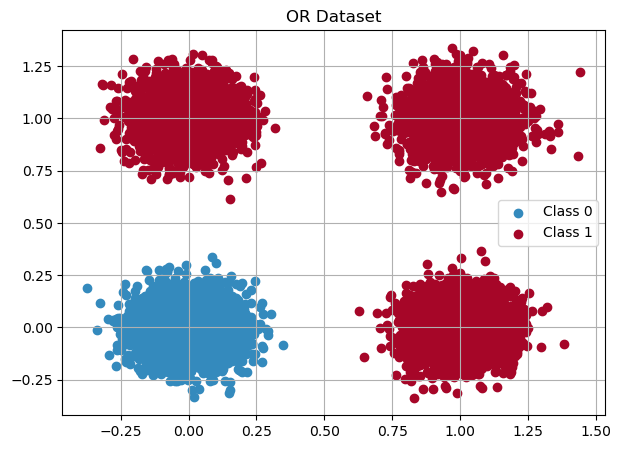

In [7]:
plotDataset(orInput, orOutput, "OR Dataset")

Data Size: 100| Training Loss: 0.2237236442359724| Training Accuracy: 0.575| Test Loss: 0.20630995151573192| Test Accuracy: 0.7
Data Size: 1000| Training Loss: 0.2204510736622227| Training Accuracy: 0.675| Test Loss: 0.2215941791361009| Test Accuracy: 0.66
Data Size: 10000| Training Loss: 0.22096264610233185| Training Accuracy: 0.703625| Test Loss: 0.22167001408660605| Test Accuracy: 0.705


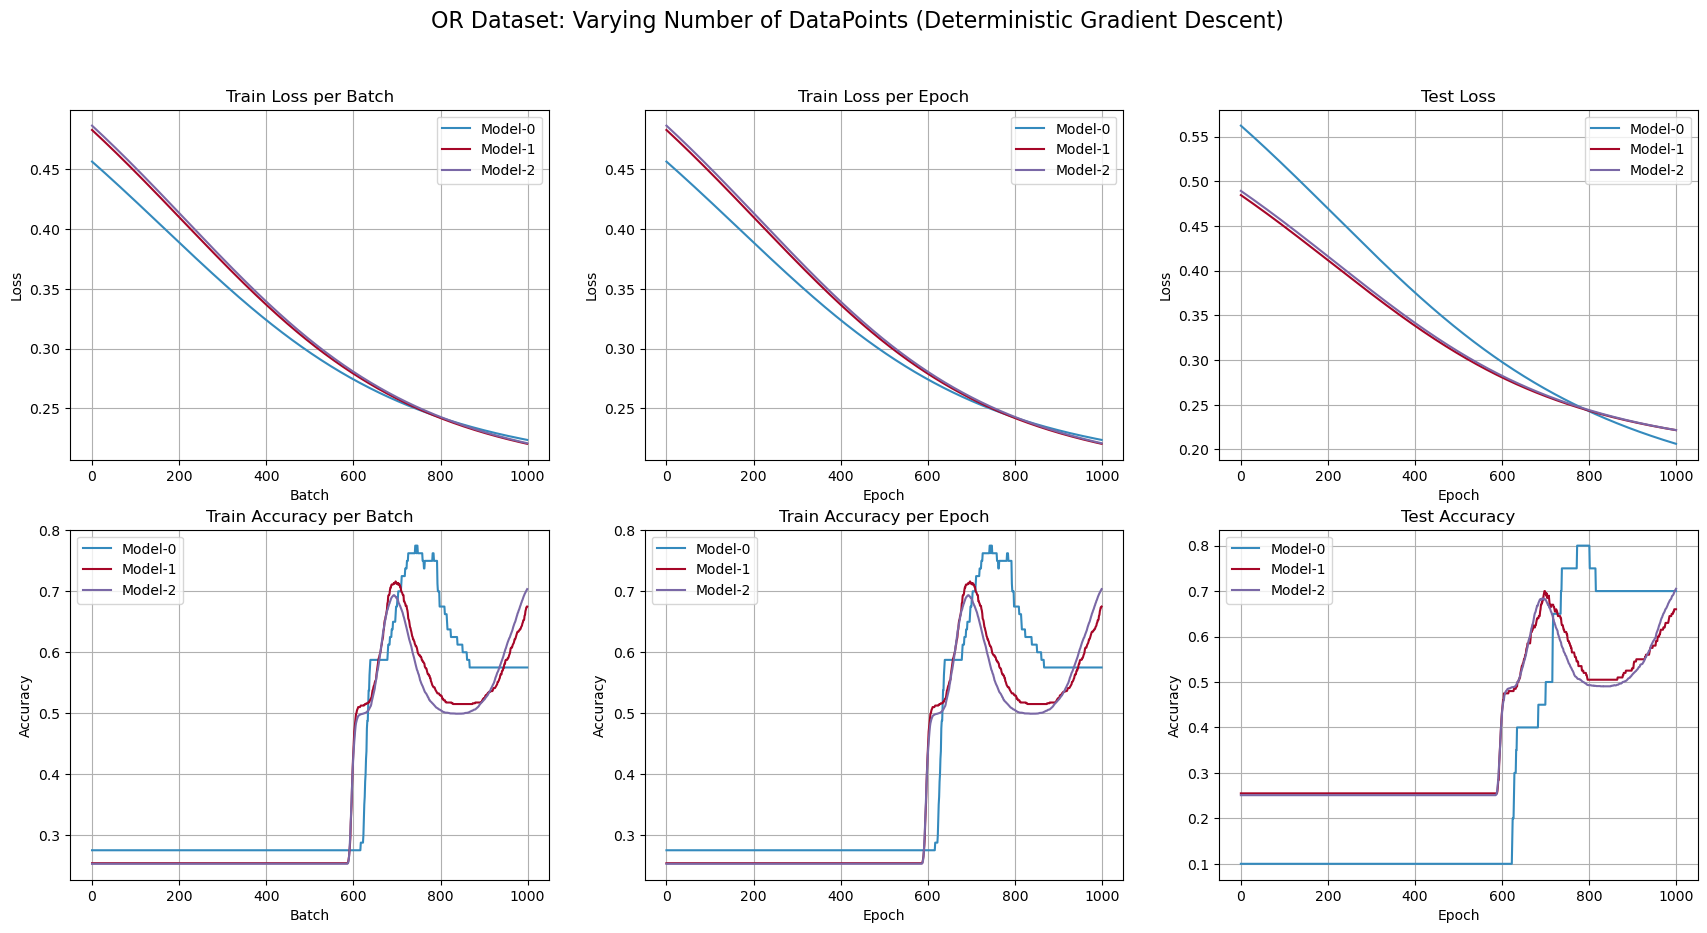

In [8]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 1000,
                   "batch_size" : -1,
                   "n_samples" : [100, 1000, 10000]}
trainModel(model_arguments, (orInput, orOutput), "OR Dataset: Varying Number of DataPoints (Deterministic Gradient Descent)", "n_samples", random_state=2)

Batch Size: 32| Training Loss: 0.0020305045029767018| Training Accuracy: 0.999875| Test Loss: 0.0018026944550988261| Test Accuracy: 1.0
Batch Size: 64| Training Loss: 0.005175702535910353| Training Accuracy: 0.999875| Test Loss: 0.004883894188299779| Test Accuracy: 1.0
Batch Size: 128| Training Loss: 0.021774472283459384| Training Accuracy: 0.9995| Test Loss: 0.02144251143517514| Test Accuracy: 1.0


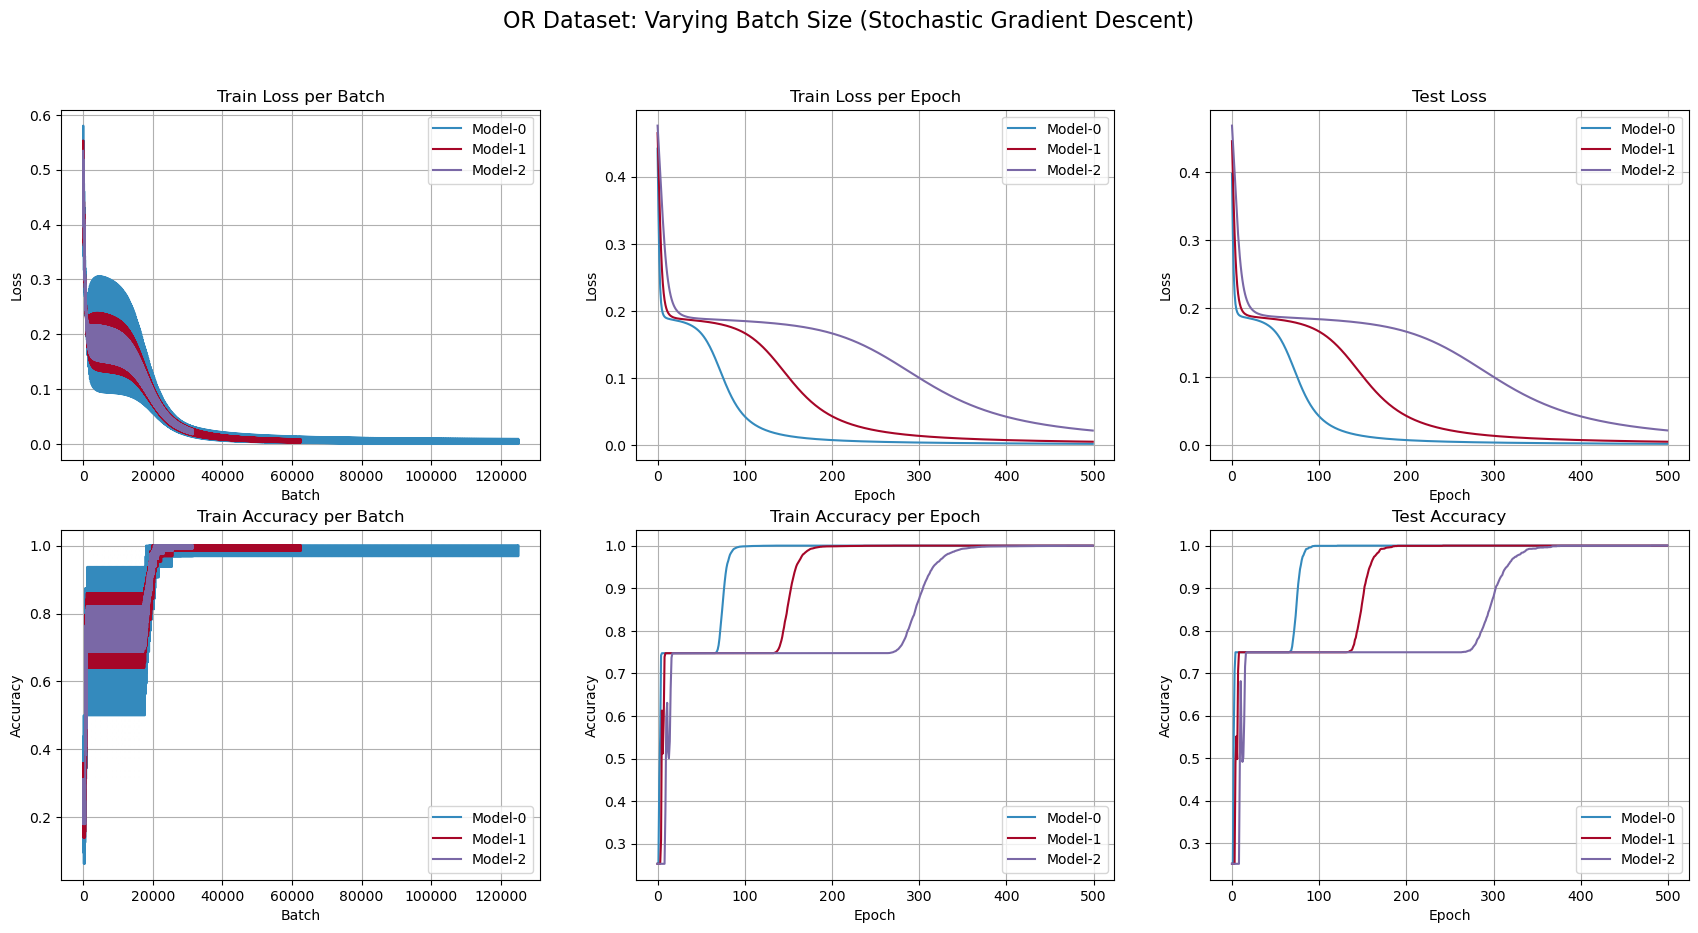

In [9]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 500,
                   "batch_size" : [32, 64, 128]}
trainModel(model_arguments, (orInput, orOutput), "OR Dataset: Varying Batch Size (Stochastic Gradient Descent)", "batch_size", random_state=2)

## AND Dataset

In [10]:
# Creating a dataset
N = 10000
andInput = np.random.randint(2, size=(N, 2)).astype(float)
andOutput = np.logical_and(andInput[:, 0],andInput[:, 1]).astype(int)
andInput += np.random.normal(0, 0.1, size=(N, 2))

andDataset = (andInput, andOutput)

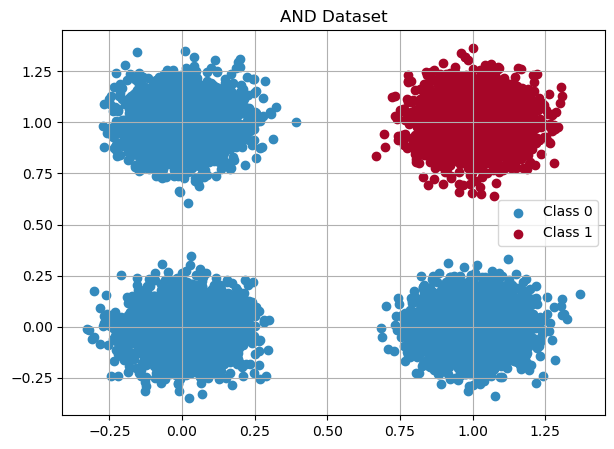

In [11]:
plotDataset(andInput, andOutput, "AND Dataset")

Data Size: 100| Training Loss: 0.18763345922660338| Training Accuracy: 0.75| Test Loss: 0.21522117537821836| Test Accuracy: 0.6
Data Size: 1000| Training Loss: 0.18959250015980914| Training Accuracy: 0.7525| Test Loss: 0.2007948878890337| Test Accuracy: 0.7
Data Size: 10000| Training Loss: 0.19167471402161998| Training Accuracy: 0.747| Test Loss: 0.192477740264692| Test Accuracy: 0.7425


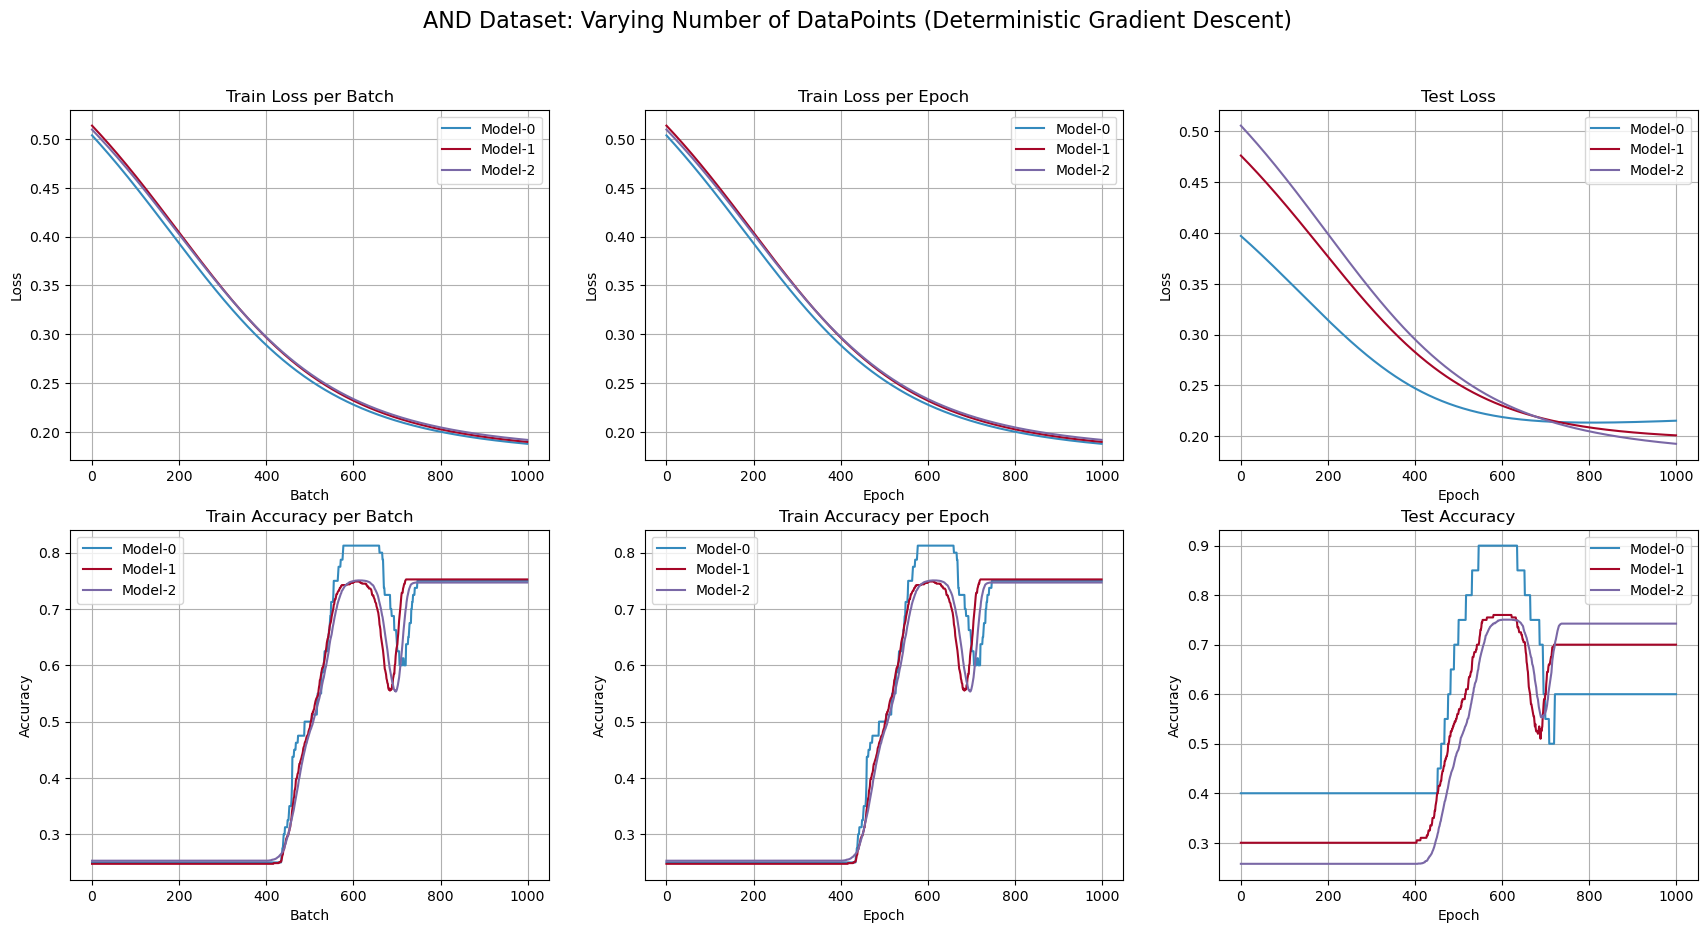

In [12]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 1000,
                   "batch_size" : -1,
                   "n_samples" : [100, 1000, 10000]}
trainModel(model_arguments, (andInput, andOutput), "AND Dataset: Varying Number of DataPoints (Deterministic Gradient Descent)", "n_samples", random_state=1)

Batch Size: 32| Training Loss: 0.003607718496692601| Training Accuracy: 1.0| Test Loss: 0.0037089592669185883| Test Accuracy: 1.0
Batch Size: 64| Training Loss: 0.010741299164747859| Training Accuracy: 1.0| Test Loss: 0.010900907882231956| Test Accuracy: 1.0
Batch Size: 128| Training Loss: 0.046851699546501396| Training Accuracy: 1.0| Test Loss: 0.047163727761293385| Test Accuracy: 0.9995


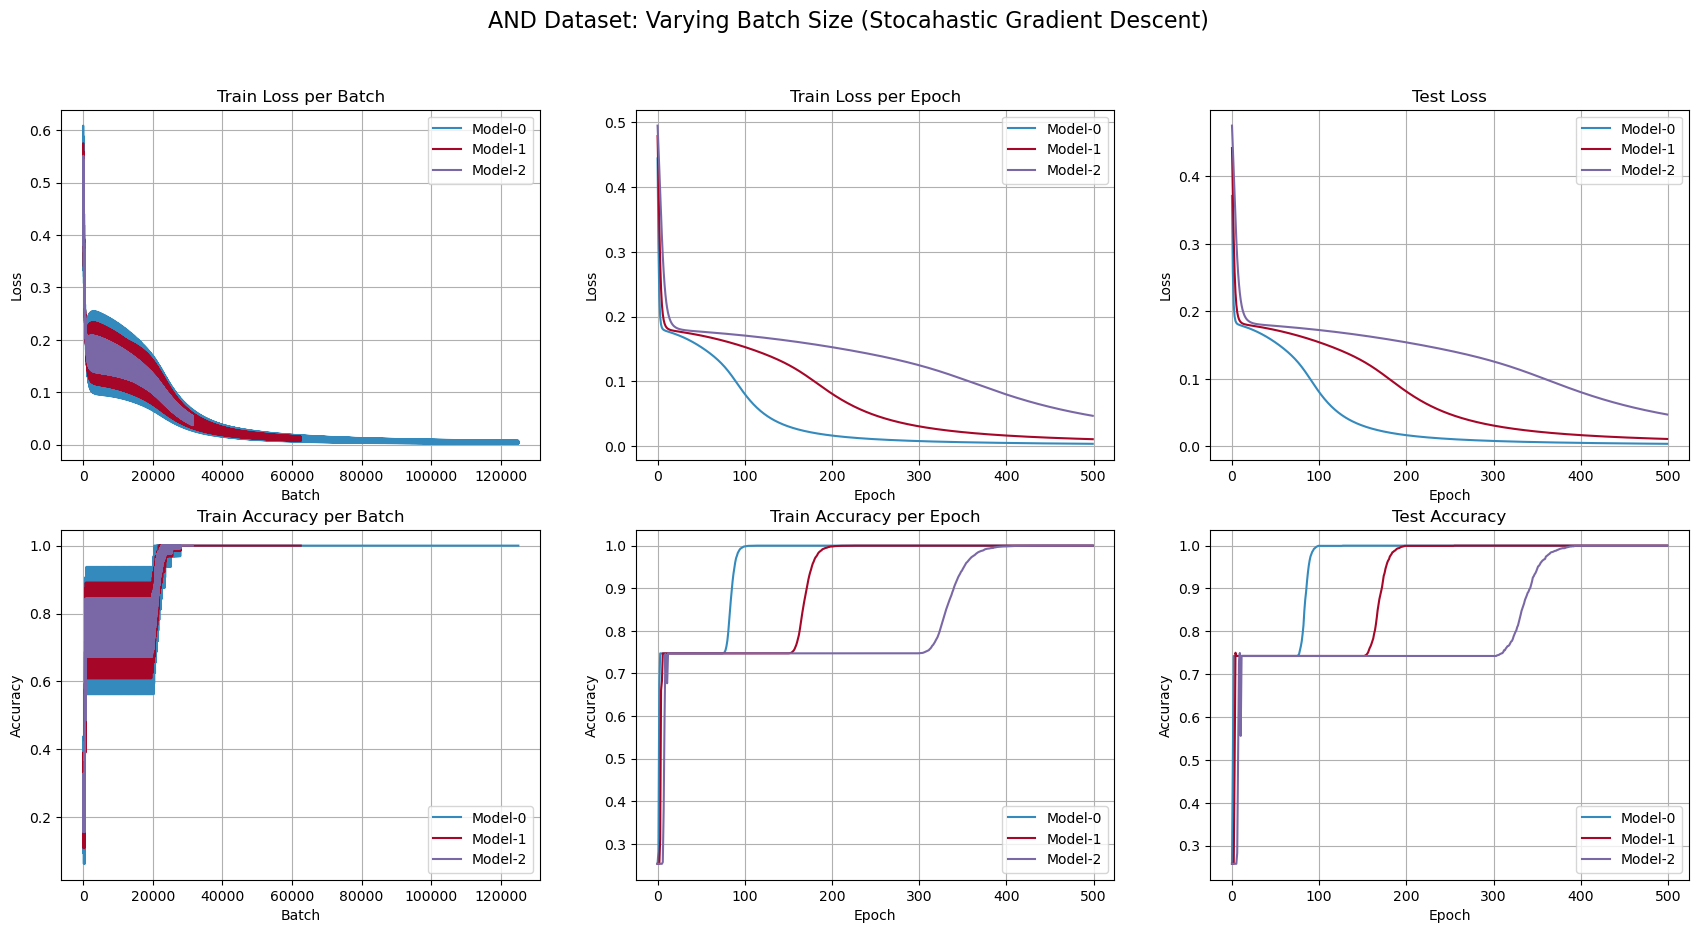

In [13]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 500,
                   "batch_size" : [32, 64, 128]}
trainModel(model_arguments, (andInput, andOutput), "AND Dataset: Varying Batch Size (Stocahastic Gradient Descent)", "batch_size", random_state=1)

## XOR Dataset

In [14]:
# Creating a dataset
N = 10000
xorInput = np.random.randint(2, size=(N, 2)).astype(float)
xorOutput = np.logical_xor(xorInput[:, 0], xorInput[:, 1]).astype(int)
xorInput += np.random.normal(0, 0.1, size=(N, 2))

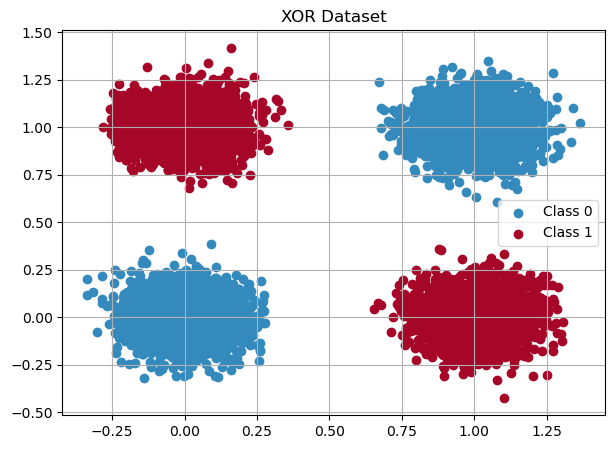

In [15]:
plotDataset(xorInput, xorOutput, "XOR Dataset")

Data Size: 100| Training Loss: 0.2507624346703591| Training Accuracy: 0.5125| Test Loss: 0.25295278150078193| Test Accuracy: 0.5
Data Size: 1000| Training Loss: 0.24605802136945643| Training Accuracy: 0.5725| Test Loss: 0.2521483643911892| Test Accuracy: 0.51
Data Size: 10000| Training Loss: 0.24912516205956972| Training Accuracy: 0.424125| Test Loss: 0.2494049661921449| Test Accuracy: 0.427


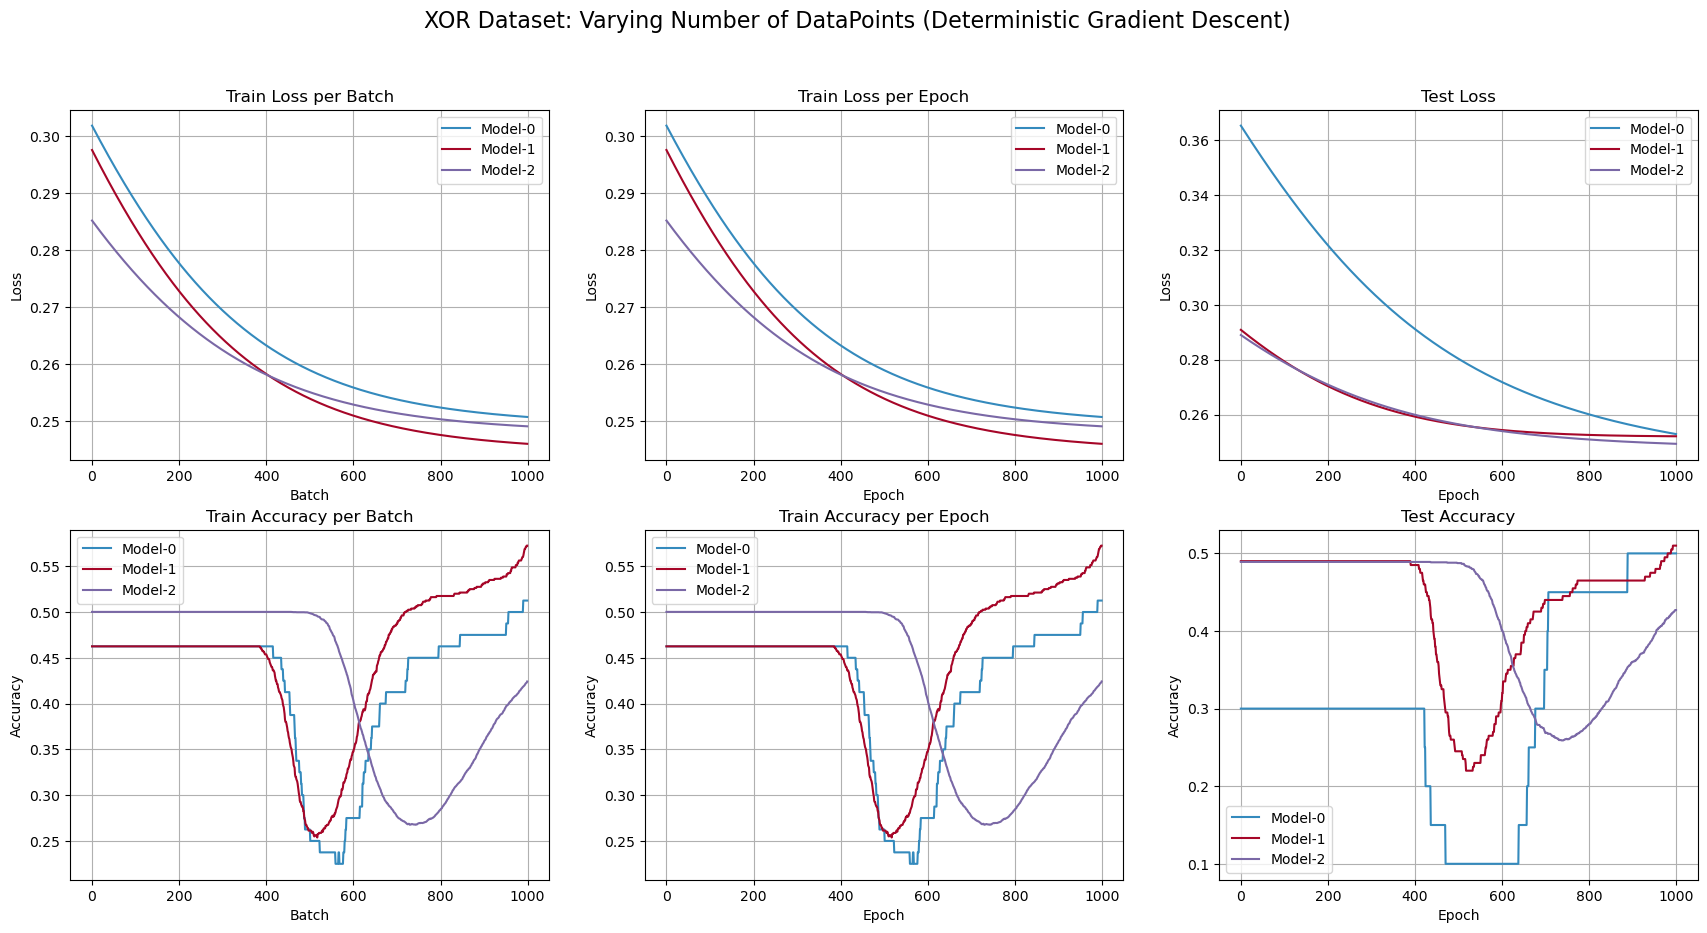

In [16]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 1000,
                   "batch_size" : -1,
                   "n_samples" : [100, 1000, 10000]}
trainModel(model_arguments, (xorInput, xorOutput), "XOR Dataset: Varying Number of DataPoints (Deterministic Gradient Descent)", "n_samples", random_state=6)

Batch Size: 32| Training Loss: 0.17526758251450833| Training Accuracy: 0.7525| Test Loss: 0.17346110274587548| Test Accuracy: 0.7575
Batch Size: 64| Training Loss: 0.18879129753675739| Training Accuracy: 0.75175| Test Loss: 0.18694538768334729| Test Accuracy: 0.757
Batch Size: 128| Training Loss: 0.21453778500646306| Training Accuracy: 0.751| Test Loss: 0.2131169170942781| Test Accuracy: 0.7565


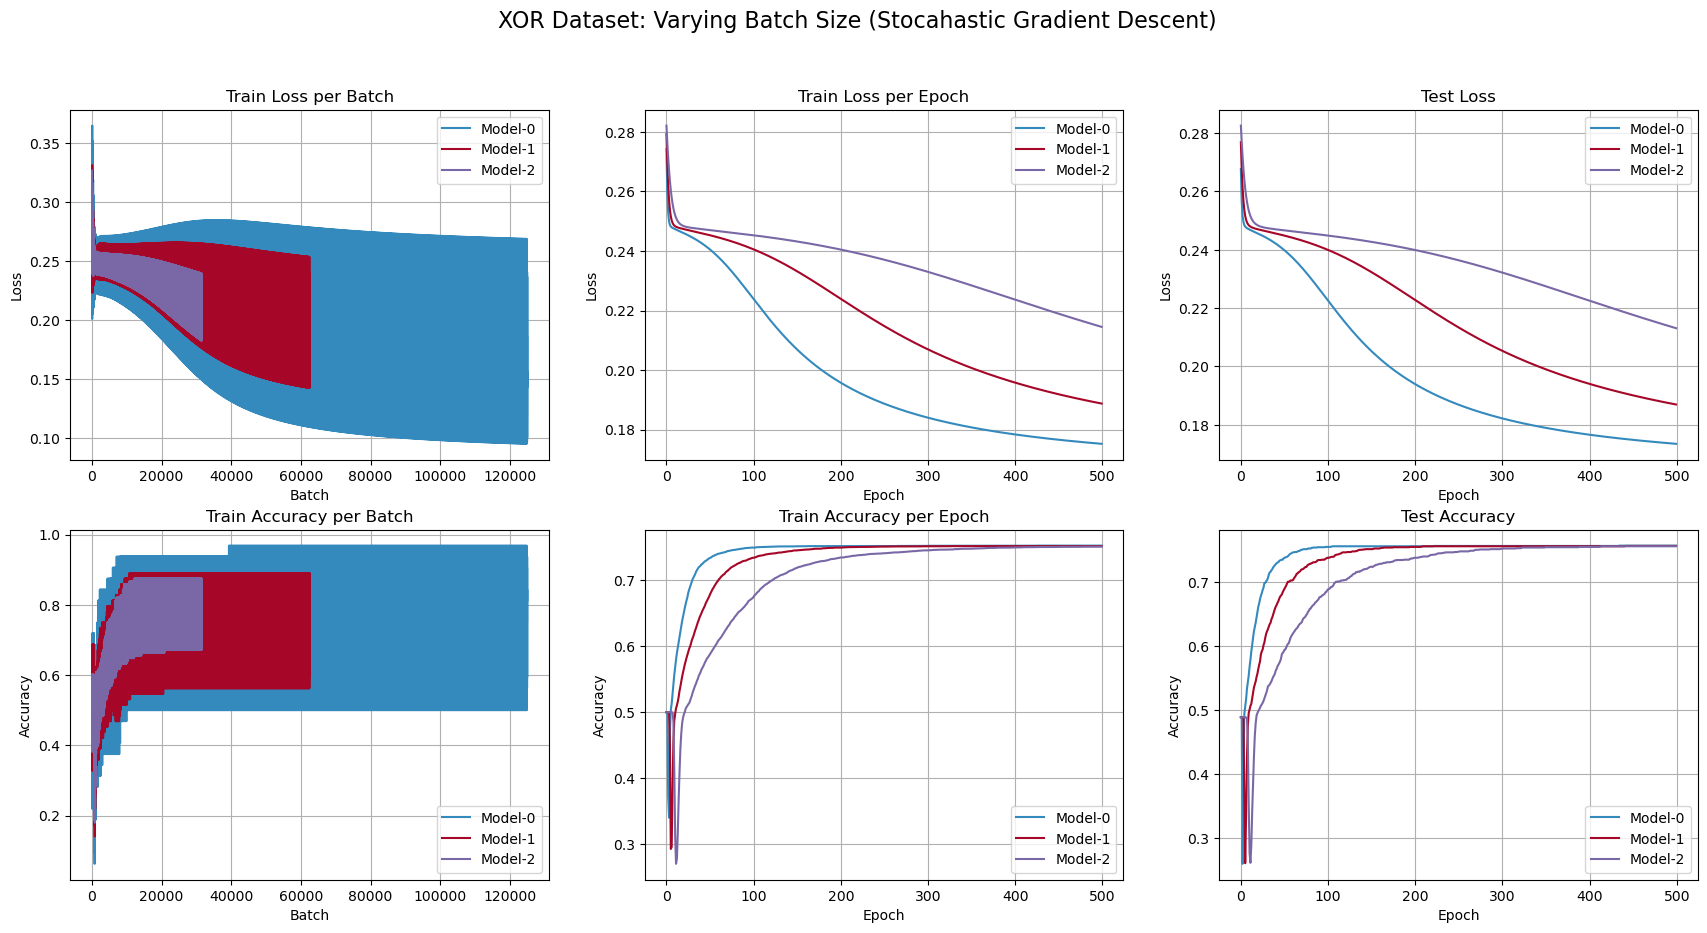

In [17]:
model_arguments = {"hidden_layer" : 2,
                   "split" : 0.8,
                   "learning_rate" : 0.01,
                   "epochs" : 500,
                   "batch_size" : [32, 64, 128]}
trainModel(model_arguments, (xorInput, xorOutput), "XOR Dataset: Varying Batch Size (Stocahastic Gradient Descent)", "batch_size", random_state=6)